In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from IPython.display import SVG, display, display_png 
import plotly.io as pio 

from datetime import datetime

import os

In [2]:
dir_path = os.listdir(r'dados')
names_f = [name.split('_')[1] for name  in dir_path] 

categories = {}
for path,names in zip(dir_path,names_f):
    categories[names] = pd.read_csv(rf'dados\{path}')

In [3]:
#configuração do botão
buttons_fig = [dict(method = "restyle",
                 args = [{"type": "scatter",
                     'x': [categories[k]['predito'].index.values, categories[k]['original'].index.values],
                     'y': [categories[k]['predito'].sort_values().values, categories[k]['original'].sort_values().values],
                     'showlegend': True}], 
                 label = k)  for k in categories]

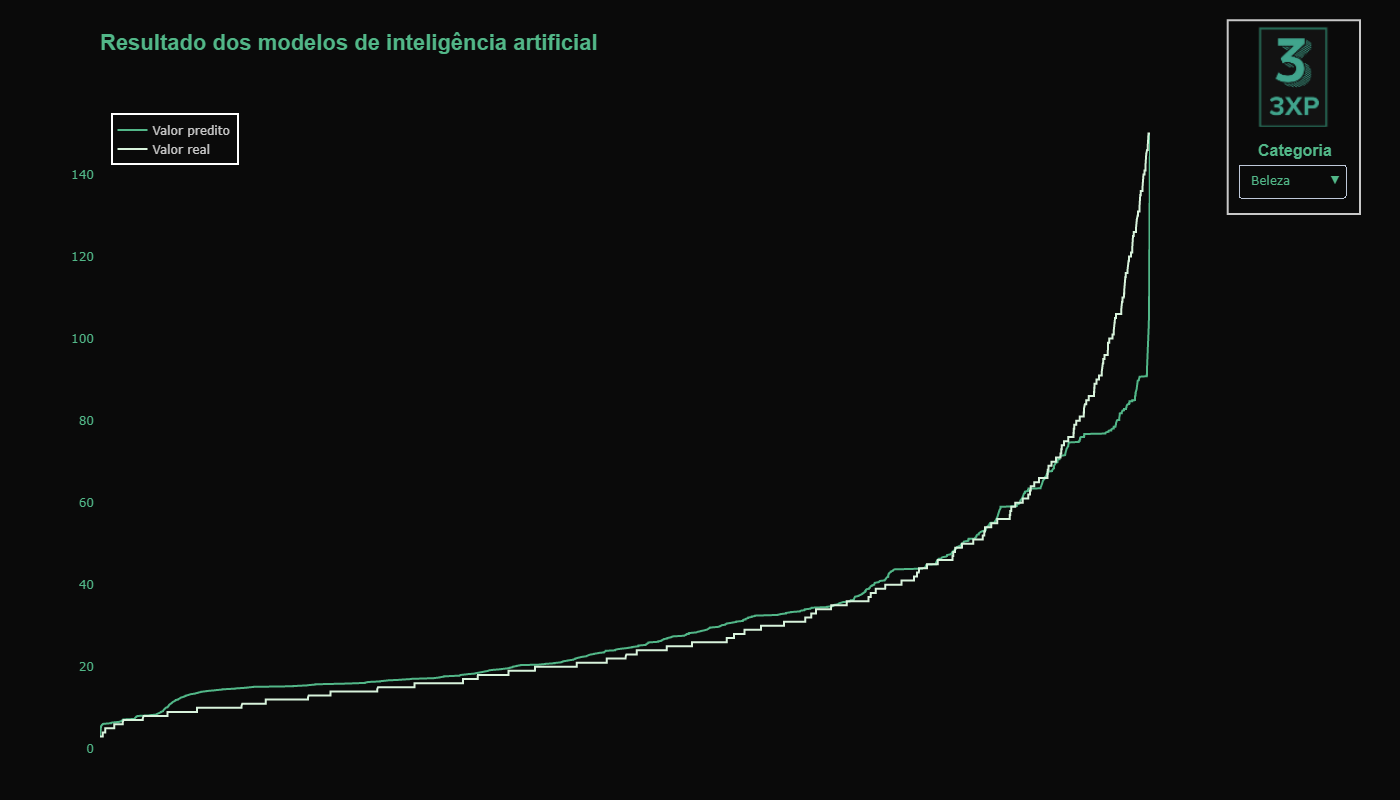

In [4]:
fig = go.Figure()
#adição dos traços
fig.add_trace(
      go.Scatter
      (
      x = categories['Homem']['predito'].index.values,
      y = categories['Homem']['predito'].sort_values(),
      name = 'Valor predito',
      marker_color = '#52b788',
      showlegend = True, 
    )
)

fig.add_trace(
      go.Scatter
      (
      x = categories['Homem']['original'].index.values,
      y = categories['Homem']['original'].sort_values(),
      name = 'Valor real',
      marker_color = '#d8f3dc',
      showlegend = True 
    )
)

#configuração dos dropdowns e layouts
fig.update_layout(
        title = {'text': '<b  style = "color:#52b788;font-size:22"><br>Resultado dos modelos de inteligência artificial</br>',
                'font_family':"Arial",
                'font_size':14,
                'xref' :'paper',
                'y': 0.96,
                'x': 0,
                'xanchor': 'left',
                'yanchor': 'bottom'},
        margin=dict(
        l=100,
        r=250,
        b=30,
        t=100,
        pad=5
        ),
        width=1400, #tamanho do papel
        height=800, #tamanho do papel
        paper_bgcolor = 'rgb(10,10,10)', # cor de fundo do papel do gráfico
        plot_bgcolor = 'rgb(10,10,10)', # cor de fundo do gráfico
        updatemenus=[
                    dict(
            buttons= buttons_fig,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=1.195,
            xanchor="right",
            y=0.92,
            yanchor="top",
            font = dict(color="#52b788"),
            bgcolor = 'rgb(10,10,10)'
        )],
    yaxis = dict(tickfont=dict(color="#52b788")),
    legend=dict(
    yanchor="top",
    y=0.98,
    xanchor="left",
    x=0.01,
    font_color = "rgb(200,200,200)",
    bordercolor="rgb(256,256,256)",
    bgcolor = 'rgb(10,10,10)',
    borderwidth=2
))
#adiciona o titulo do dropdown
fig.add_annotation(dict(xref='paper', yref = 'paper', x=1.175, y=0.94,
                xanchor='right', yanchor='top',
                text='<b>Categoria</b>',
                font=dict(family='Arial',
                        size=16,
                        color ='#52b788'),
                showarrow = False
                ))

# adiciona uma logo ao gráfico
fig.add_layout_image(
        dict(
                source='https://i.imgur.com/ik6ADIS.png',
                xref="paper", yref="paper",
                x=1.17, y=0.96,
                sizex=0.15, sizey=0.15,
                xanchor="right", yanchor="bottom" # define a origem do logo
        )
)
#configuração dos eixos
fig.update_xaxes(showgrid=False, visible = False)
fig.update_yaxes(showgrid=False, zerolinecolor = 'rgb(10,10,10)')

fig.add_shape(
        type='rect',
        x0=1.074,
        y0=1.119,
        x1=1.2,
        y1=0.83,
        line=dict(color='rgb(200,200,200)',),
        xref='paper',
        yref='paper'
)

# COMENTAR ESTE CÓDIGO CASO QUEIRA INTERAGIR COM O GRÁFICO ABAIXO
img_bytes = fig.to_image(format="png")
display_png((img_bytes), raw = True)
##################################################################

# USAR CODIGO ABAIXO CASO QUERIA INTERAGIR COM O GRÁFICO
# fig.show() 